# Predicción de cuotas de apuestas

En este ejercicio vamos a implementar una única red neuronal para predecir las cuotas de victoria, empate y derrota en partidos de fútbol

![img](https://www.ecestaticos.com/image/clipping/6192cd83066e196913e3045d412b937b/multan-a-la-casa-de-apuestas-digital-888-por-el-polemico-anuncio-de-carlos-sobera.jpg)

Los datos de cada casa de apuestas se encuentran en formato JSON dentro de la carpeta `data` con el nombre `bookmakerXXX.json`. Utiliza estos ficheros para crear un único dataframe con el que entrenar y probar el modelo.  
Por último, utiliza el fichero `predicciones.json` para analizar las cuotas de un único partido

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir('data') if f[0:4]=='book']
onlyfiles

['bookmaker17.json',
 'bookmaker22.json',
 'bookmaker274.json',
 'bookmaker282.json',
 'bookmaker285.json',
 'bookmaker30.json',
 'bookmaker327.json',
 'bookmaker37.json',
 'bookmaker385.json',
 'bookmaker42.json',
 'bookmaker6.json',
 'bookmaker83.json',
 'bookmaker84.json']

In [4]:
df1x2 = pd.DataFrame()
for file in onlyfiles:
    with open('data/'+file) as json_file:
        data = json.load(json_file)
        df = pd.DataFrame.from_dict(data)
        df1x2 = pd.concat([df1x2, df], axis=0)

In [5]:
df1x2

,CoMatch,CoBookmaker,TsOdd,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,DsMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA
10578,1729828,17,2019-09-11 11:09:13,3913,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.89,0.09,0.02
119314,1677221,17,2019-09-26 19:19:53,4613,0.52,0.27,3,2ST61,76,61.0,0,1,0,0,0.13,0.30,0.57
211966,1693901,17,2019-09-22 12:44:57,6117,0.29,0.30,3,2ST86,101,86.0,0,0,0,0,0.08,0.79,0.13
158689,1767673,17,2019-10-02 16:33:45,1965,0.51,0.25,1,1ST32,32,32.0,0,1,0,0,0.21,0.28,0.51
207804,1694621,17,2019-08-25 20:53:57,4917,0.55,0.27,3,2ST66,81,66.0,1,1,0,0,0.44,0.46,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100949,1724257,84,2019-09-13 21:32:07,5347,0.69,0.19,3,2ST74,89,74.0,1,0,0,0,0.85,0.13,0.02
99925,1677253,84,2019-10-20 14:47:59,2819,0.32,0.29,1,1ST45+,46,46.0,0,1,0,0,0.12,0.26,0.62
71473,1724595,84,2019-09-08 18:37:50,5690,0.40,0.28,3,2ST79,94,79.0,2,2,0,0,0.02,0.16,0.81
232985,1677256,84,2019-10-19 20:34:38,5558,0.16,0.22,3,2ST77,92,77.0,1,0,0,1,0.74,0.21,0.05


In [6]:
df1x2.describe()

,CoMatch,CoBookmaker,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,9694.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.705711e+06,198.140800,2985.280300,0.431227,0.277829,1.852400,49.26420,42.741593,0.446900,0.392400,0.039700,0.028900,0.393787,0.329939,0.276252
std,3.046140e+04,143.794335,1979.310646,0.131598,0.039863,0.979035,32.98975,26.786407,0.673369,0.635344,0.203784,0.169315,0.243532,0.162054,0.218576
min,1.676673e+06,6.000000,2.000000,0.100000,0.060000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,1.677186e+06,42.000000,1386.500000,0.340000,0.260000,1.000000,23.00000,22.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.220000,0.120000
50%,1.694637e+06,282.000000,2354.000000,0.420000,0.290000,1.000000,39.00000,37.000000,0.000000,0.000000,0.000000,0.000000,0.360000,0.310000,0.230000
75%,1.725137e+06,327.000000,5148.000000,0.510000,0.310000,3.000000,85.00000,71.000000,1.000000,1.000000,0.000000,0.000000,0.552500,0.380000,0.350000
max,1.778095e+06,385.000000,6559.000000,0.920000,0.350000,4.000000,109.00000,94.000000,4.000000,4.000000,2.000000,2.000000,0.970000,0.920000,0.990000


In [7]:
df1x2.isnull().sum()

CoMatch            0
CoBookmaker        0
TsOdd              0
TsElapsed          0
VlProbH_ini        0
VlProbD_ini        0
CoMatchState       0
DsMatchState       0
VlGameTime         0
VlMinute         306
VlHomeScore        0
VlAwayScore        0
VlHomeRedCard      0
VlAwayRedCard      0
VlProbH            0
VlProbD            0
VlProbA            0
dtype: int64

In [8]:
df1x2[['VlGameTime','VlMinute']].loc[df1x2.VlMinute.isna()]

,VlGameTime,VlMinute
287303,60,NaN
176481,53,NaN
253702,50,NaN
183863,46,NaN
117314,54,NaN
...,...,...
146318,59,NaN
267674,87,NaN
192855,50,NaN
57151,62,NaN


In [9]:
# Nuevas variables
df1x2['diff_goles'] = df1x2.VlHomeScore-df1x2.VlAwayScore
df1x2['VlGameTimeNorm'] = df1x2.VlGameTime/100

In [10]:
datos=df1x2[['CoMatch', 'TsOdd',  'VlProbH_ini',
       'VlProbD_ini', 'VlGameTime', 
       'VlHomeScore', 'VlAwayScore', 'VlHomeRedCard', 'VlAwayRedCard',
       'VlProbH', 'VlProbD','VlProbA', 'diff_goles','VlGameTimeNorm']]

In [12]:
df1x2.loc[(df1x2.CoMatch==1729828) & (df1x2.VlGameTime==65)]

,CoMatch,CoBookmaker,TsOdd,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,DsMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA,diff_goles,VlGameTimeNorm
10578,1729828,17,2019-09-11 11:09:13,3913,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.89,0.09,0.02,2,0.65
11051,1729828,385,2019-09-11 11:09:53,3953,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.83,0.15,0.02,2,0.65
11490,1729828,6,2019-09-11 11:08:12,3912,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.88,0.09,0.03,2,0.65
11378,1729828,84,2019-09-11 11:08:57,3957,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.86,0.11,0.03,2,0.65


In [13]:
# Train test split
np.random.seed(50)

comatches = datos.CoMatch.unique()
print(len(comatches))

train_len = int(0.85*datos.CoMatch.nunique())
print(train_len)

np.random.shuffle(comatches)

comatches_train, comatches_test = comatches[:train_len], comatches[train_len:]

917
779


In [14]:
len(comatches_train), len(comatches_test)

(779, 138)

In [25]:
train = datos.loc[datos.CoMatch.isin(comatches_train)].drop(columns=['CoMatch','TsOdd']).drop_duplicates()
test = datos.loc[datos.CoMatch.isin(comatches_test)].drop(columns=['CoMatch','TsOdd']).drop_duplicates()

In [26]:
train.head()

,VlProbH_ini,VlProbD_ini,VlGameTime,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA,diff_goles,VlGameTimeNorm
119314,0.52,0.27,76,0,1,0,0,0.13,0.30,0.57,-1,0.76
211966,0.29,0.30,101,0,0,0,0,0.08,0.79,0.13,0,1.01
158689,0.51,0.25,32,0,1,0,0,0.21,0.28,0.51,-1,0.32
197169,0.39,0.31,84,2,0,0,0,0.95,0.04,0.01,2,0.84
248557,0.38,0.30,72,1,1,0,0,0.27,0.45,0.28,0,0.72


In [27]:
train.shape, test.shape

((8099, 12), (1501, 12))

In [28]:
1566/1834

0.8538713195201745

In [29]:
train.isna().sum()

VlProbH_ini       0
VlProbD_ini       0
VlGameTime        0
VlHomeScore       0
VlAwayScore       0
VlHomeRedCard     0
VlAwayRedCard     0
VlProbH           0
VlProbD           0
VlProbA           0
diff_goles        0
VlGameTimeNorm    0
dtype: int64

In [30]:
X_train = train.drop(columns=['VlProbH','VlProbD','VlProbA'])
y_train = train[['VlProbH','VlProbD','VlProbA']]

X_test = test.drop(columns=['VlProbH','VlProbD','VlProbA'])
y_test = test[['VlProbH','VlProbD','VlProbA']]

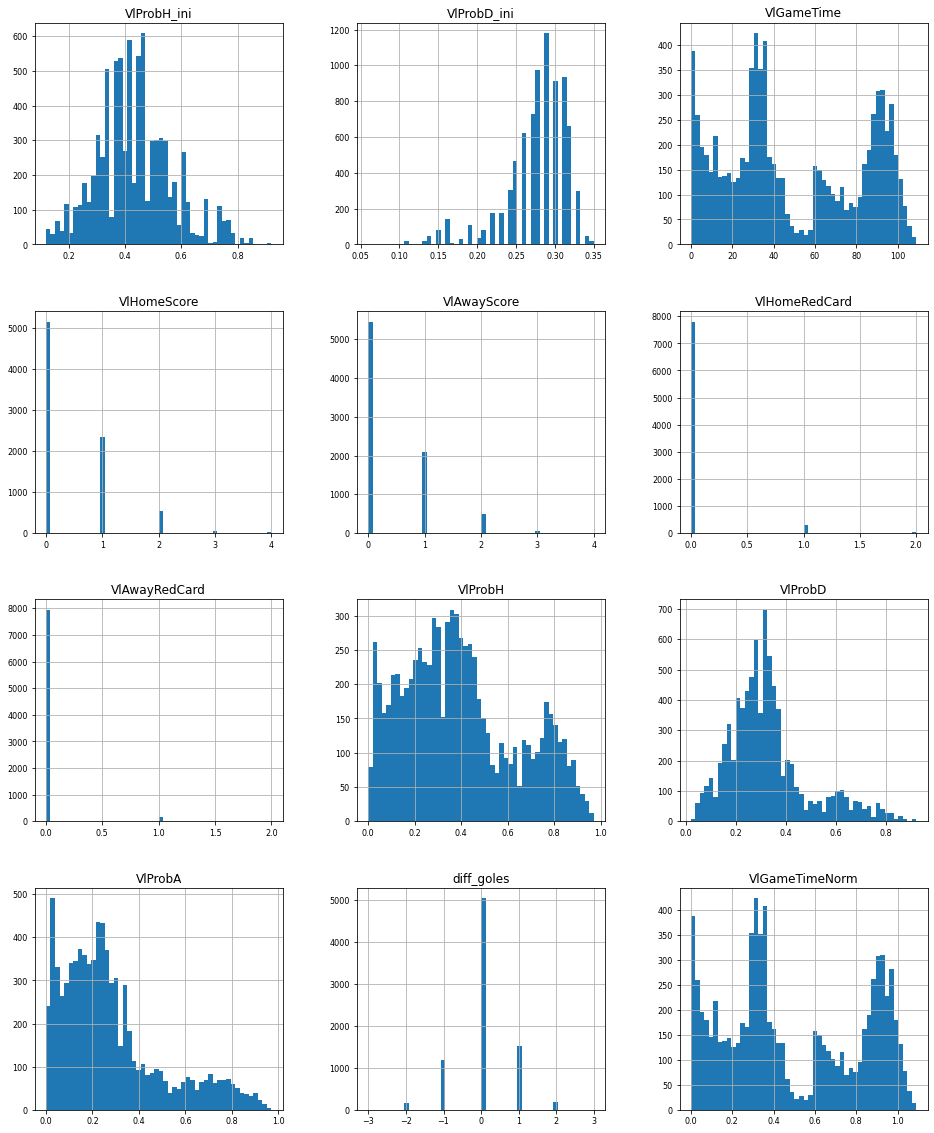

In [31]:
train.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

In [32]:
X_train = X_train[['diff_goles','VlGameTimeNorm','VlProbD_ini',
                   'VlProbH_ini','VlHomeRedCard','VlAwayRedCard'
                  ]]

X_train.shape

(8099, 6)

In [33]:
X_test = X_test[['diff_goles','VlGameTimeNorm','VlProbD_ini',
                   'VlProbH_ini','VlHomeRedCard','VlAwayRedCard'
                  ]]

X_test.shape

(1501, 6)

In [34]:
from keras import Sequential
from keras.layers import Dense
from keras.layers.core import Activation

model = Sequential()
model.add(Dense(units=30, input_dim=6))
model.add(Activation('tanh'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                210       
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
history = model.fit(X_train, y_train,
                   batch_size=64,
                   epochs=100,
                   validation_split=0.1)

Epoch 1/100
114/114 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0158
Epoch 2/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0096
Epoch 3/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 4/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 5/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 6/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 7/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 8/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 9/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 10/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0065 - val_lo

114/114 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 82/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 83/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 84/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 85/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 86/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 87/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 88/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 89/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 90/100
114/114 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 

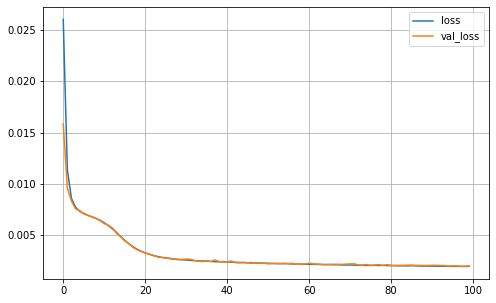

In [38]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [39]:
y_pred = model.predict(X_test)

In [42]:
y_test

,VlProbH,VlProbD,VlProbA
10578,0.89,0.09,0.02
207804,0.44,0.46,0.10
272017,0.76,0.18,0.06
268484,0.41,0.36,0.24
103890,0.43,0.30,0.26
...,...,...,...
40968,0.39,0.37,0.24
111034,0.00,0.11,0.88
216605,0.15,0.62,0.23
160441,0.86,0.13,0.01


In [40]:
y_pred

array([[0.90121275, 0.08344731, 0.0153399 ],
       [0.32543707, 0.5390288 , 0.1355341 ],
       [0.7207238 , 0.21225508, 0.0670212 ],
       ...,
       [0.15552609, 0.6282477 , 0.21622625],
       [0.7818499 , 0.18554246, 0.03260766],
       [0.32675242, 0.37340316, 0.29984438]], dtype=float32)

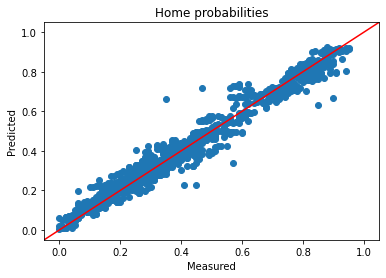

In [43]:
fig,ax = plt.subplots()
ax.scatter(y_test.VlProbH,y_pred[:,0])
ax.axline([0,0],[1,1],color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Home probabilities')
plt.show();

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.VlProbH,y_pred[:,0]) 
r2 =  r2_score(y_test.VlProbH,y_pred[:,0])
print(mse,r2)

0.0018777309021983772 0.9696279552249838


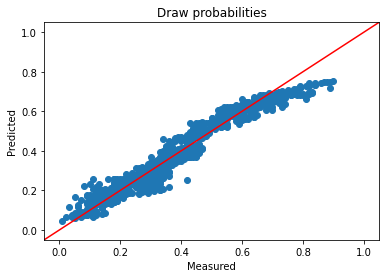

In [45]:
fig,ax = plt.subplots()
ax.scatter(y_test.VlProbD,y_pred[:,1])
ax.axline([0,0],[1,1],color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Draw probabilities')
plt.show();

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.VlProbD,y_pred[:,1]) 
r2 =  r2_score(y_test.VlProbD,y_pred[:,1])
print(mse,r2)

0.001461387332689256 0.9506648057466219


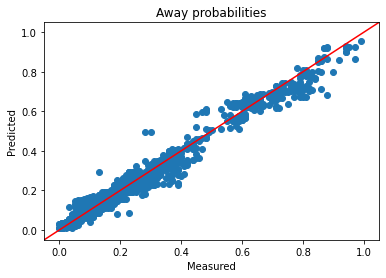

In [47]:
fig,ax = plt.subplots()
ax.scatter(y_test.VlProbA,y_pred[:,2])
ax.axline([0,0],[1,1],color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Away probabilities')
plt.show();

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.VlProbA,y_pred[:,2]) 
r2 =  r2_score(y_test.VlProbA,y_pred[:,2])
print(mse,r2)

0.0012738389595662867 0.9716195248076074


In [50]:
mean_squared_error(y_test, y_pred, multioutput='raw_values')

array([0.00187773, 0.00146139, 0.00127384])

In [51]:
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.96962796, 0.95066481, 0.97161952])

In [52]:
r2_score(y_test, y_pred)

0.9639707619264044

### Predice los resultados para el partido de predicciones.json

In [55]:
datos_new = pd.read_json('data/predicciones.json')
datos_new

,TsOdd,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,DsMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA,NaMatch
0,2019-10-01 19:00:50,50,0.6,0.25,1,1ST0,0,0,0,0,0,0,0.60,0.25,0.15,Celta vs Valladolid
1,2019-10-01 19:09:51,591,0.6,0.25,1,1ST9,9,9,0,0,0,0,0.52,0.30,0.18,Celta vs Valladolid
2,2019-10-01 20:48:32,6452,0.6,0.25,3,2ST90+,107,92,1,0,0,0,0.95,0.05,0.00,Celta vs Valladolid
3,2019-10-01 20:33:53,5573,0.6,0.25,3,2ST77,92,77,1,0,0,0,0.87,0.12,0.01,Celta vs Valladolid
4,2019-10-01 20:04:27,3807,0.6,0.25,3,2ST48,63,48,1,0,0,0,0.79,0.16,0.05,Celta vs Valladolid
5,2019-10-01 20:38:56,5876,0.6,0.25,3,2ST82,97,82,1,0,0,0,0.89,0.10,0.01,Celta vs Valladolid
6,2019-10-01 19:12:51,771,0.6,0.25,1,1ST12,12,12,0,0,0,0,0.52,0.30,0.18,Celta vs Valladolid
7,2019-10-01 19:31:10,1810,0.6,0.25,1,1ST30,30,30,1,0,0,0,0.76,0.18,0.06,Celta vs Valladolid
8,2019-10-01 20:48:41,6461,0.6,0.25,3,2ST90+,107,92,1,0,0,0,0.94,0.06,0.00,Celta vs Valladolid
9,2019-10-01 20:34:05,5585,0.6,0.25,3,2ST78,93,78,1,0,0,0,0.87,0.12,0.01,Celta vs Valladolid


In [56]:
datos_new['diff_goles'] = datos_new.VlHomeScore-datos_new.VlAwayScore
datos_new['VlGameTimeNorm'] = datos_new.VlGameTime/110

In [57]:
df=datos_new[['diff_goles','VlGameTimeNorm','VlProbD_ini','VlProbH_ini','VlHomeRedCard','VlAwayRedCard']]

In [58]:
y_pred = model.predict(df)
y_pred

array([[0.5846387 , 0.26041952, 0.15494171],
       [0.57349664, 0.27079803, 0.15570526],
       [0.8456726 , 0.13788322, 0.01644412],
       [0.81959265, 0.1579826 , 0.02242474],
       [0.77192354, 0.18824954, 0.03982694],
       [0.8287688 , 0.15102704, 0.02020422],
       [0.57002145, 0.27409667, 0.15588185],
       [0.7599229 , 0.17334954, 0.06672763],
       [0.8456726 , 0.13788322, 0.01644412],
       [0.8214488 , 0.1565892 , 0.02196196],
       [0.7588702 , 0.18637444, 0.05475539]], dtype=float32)

In [59]:
r2_score(datos_new[['VlProbH','VlProbD','VlProbA']]
         ,y_pred,multioutput='raw_values')

array([0.8626807 , 0.7171137 , 0.95502463])

In [60]:
mean_squared_error(datos_new[['VlProbH','VlProbD','VlProbA']]
         ,y_pred,multioutput='raw_values')

array([0.00312339, 0.00197179, 0.00021045])

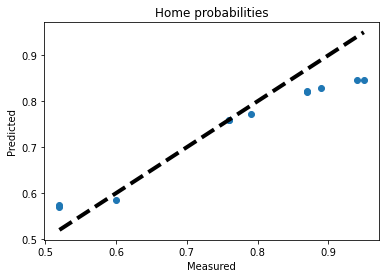

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(datos_new.VlProbH.values, y_pred[:,0])
ax.plot([datos_new.VlProbH.values.min(), datos_new.VlProbH.values.max()], [datos_new.VlProbH.values.min(), datos_new.VlProbH.values.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Home probabilities')
plt.show()